### Dynamic Pricing Strategy: Overview
Dynamic pricing is a strategic approach where businesses adjust the prices of their products or services in real-time based on various factors. This practice harnesses the power of data science to optimize revenue and profitability by setting prices that respond dynamically to market demand, customer behavior, and competitor pricing.

For instance, imagine a scenario where a ride-sharing company operates in a bustling city. Traditionally, they might have set fixed rates per kilometer, overlooking fluctuations in demand and supply. However, by adopting dynamic pricing, they can analyze a plethora of data points such as historical trip data, real-time demand, traffic patterns, and local events.

Utilizing machine learning algorithms, the company can then tweak prices on the fly. During peak hours or busy events, prices might rise slightly to attract more drivers and balance the supply-demand equation. Conversely, during quieter periods, prices could be lowered to entice more customers.

In essence, dynamic pricing is all about finding the sweet spot where prices maximize revenue while keeping customers satisfied. This strategy involves adjusting prices based on factors like time of day, day of the week, customer segments, inventory levels, seasonal changes, competitor actions, and prevailing market conditions.

To implement such a strategy effectively, businesses need a robust dataset comprising historical sales, customer behavior patterns, market demand forecasts, cost data, customer segmentation insights, and real-time market updates. This data serves as the foundation for crafting dynamic pricing strategies that adapt seamlessly to ever-changing market dynamics.

### About Data
A ride-sharing company wants to implement a dynamic pricing strategy to optimize fares based on real-time market conditions. The company only uses ride duration to decide ride fares currently. The company aims to leverage data-driven techniques to analyze historical data and develop a predictive model that can dynamically adjust prices in response to changing factors.

A dataset containing historical ride data has been provided. The dataset includes features such as the number of riders, number of drivers, location category, customer loyalty status, number of past rides, average ratings, time of booking, vehicle type, expected ride duration, and historical cost of the rides.
### Problem
Your goal is to build a dynamic pricing model that incorporates the provided features to predict optimal fares for rides in real-time. The model must consider factors such as demand patterns and supply availability.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("dynamic_pricing.csv")
data.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [49]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [50]:
#Now let’s have a look at the relationship between expected ride duration 
#and the historical cost of the ride:
fig = px.scatter(data, x='Expected_Ride_Duration', 
                 y='Historical_Cost_of_Ride',
                 title='Expected Ride Duration vs. Historical Cost of Ride', 
                 trendline='ols')
fig.show()

In [51]:
#Now let’s have a look at the distribution of 
#the historical cost of rides based on the vehicle type:

In [52]:
fig = px.box(data, x='Vehicle_Type', 
             y='Historical_Cost_of_Ride',
             title='Historical Cost of Ride Distribution by Vehicle Type')
fig.show()

C:\Users\sachi\AppData\Local\Temp\ipykernel_28292\2378183735.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



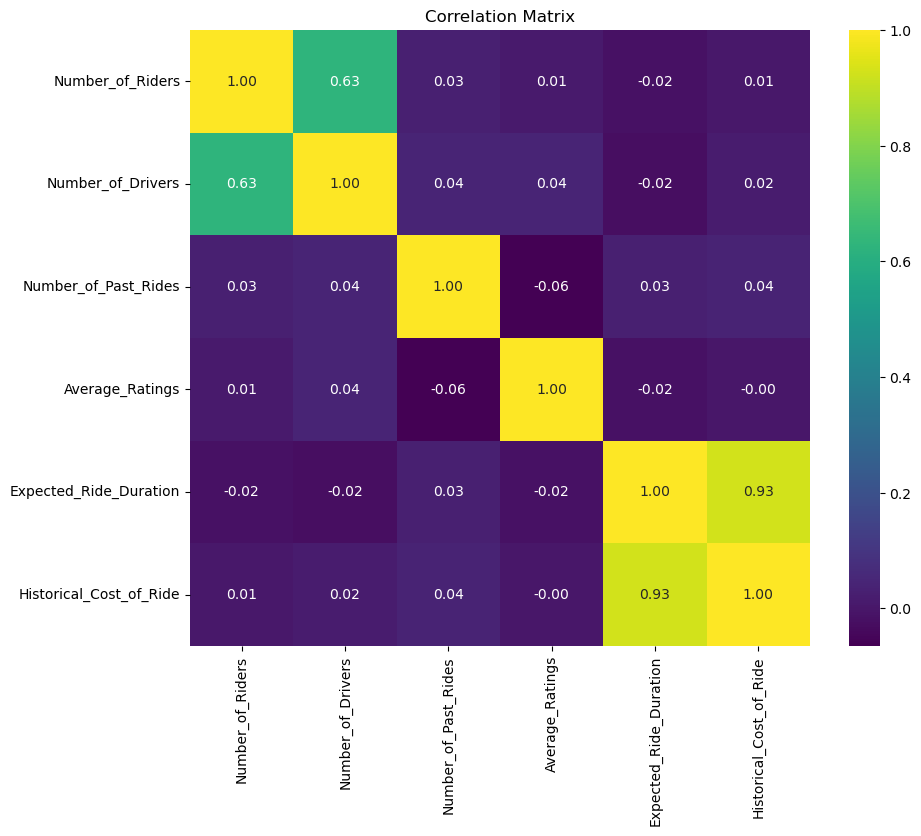

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Implementing a Dynamic Pricing Strategy
The data provided by the company states that the company uses a pricing model that only takes the expected ride duration as a factor to determine the price for a ride. Now, we will implement a dynamic pricing strategy aiming to adjust the ride costs dynamically based on the demand and supply levels observed in the data. It will capture high-demand periods and low-supply scenarios to increase prices, while low-demand periods and high-supply situations will lead to price reductions.

In [54]:
import numpy as np

# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)

In the above code, we first calculated the demand multiplier by comparing the number of riders to percentiles representing high and low demand levels. If the number of riders exceeds the percentile for high demand, the demand multiplier is set as the number of riders divided by the high-demand percentile. Otherwise, if the number of riders falls below the percentile for low demand, the demand multiplier is set as the number of riders divided by the low-demand percentile.

Next, we calculated the supply multiplier by comparing the number of drivers to percentiles representing high and low supply levels. If the number of drivers exceeds the low-supply percentile, the supply multiplier is set as the high-supply percentile divided by the number of drivers. On the other hand, if the number of drivers is below the low-supply percentile, the supply multiplier is set as the low-supply percentile divided by the number of drivers.

Finally, we calculated the adjusted ride cost for dynamic pricing. It multiplies the historical cost of the ride by the maximum of the demand multiplier and a lower threshold (demand_threshold_low), and also by the maximum of the supply multiplier and an upper threshold (supply_threshold_high). This multiplication ensures that the adjusted ride cost captures the combined effect of demand and supply multipliers, with the thresholds serving as caps or floors to control the price adjustments.

Now let’s calculate the profit percentage we got after implementing this dynamic pricing strategy:

In [55]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]

# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]


import plotly.graph_objects as go

# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.4)])
fig.update_layout(title='Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
fig.show()

Now let’s have a look at the relationship between the expected ride duration and the cost of the ride based on the dynamic pricing strategy:

In [56]:
fig = px.scatter(data, 
                 x='Expected_Ride_Duration', 
                 y='adjusted_ride_cost',
                 title='Expected Ride Duration vs. Cost of Ride', 
                 trendline='ols')
fig.show()

### Training a Predictive Model
Now, as we have implemented a dynamic pricing strategy, let’s train a Machine Learning model. Before training the model, let’s preprocess the data:

In [57]:
from sklearn.preprocessing import StandardScaler

def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    #Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])

    #Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data

In the above code, we have implemented a data preprocessing pipeline to preprocess the data. You can learn more about it here. As vehicle type is a valuable factor, let’s convert it into a numerical feature before moving forward:



In [58]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1, 
                                           "Economy": 0})

Now let’s split the data and train a Machine Learning model to predict the cost of a ride:

In [59]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Decision Tree": DecisionTreeRegressor()
}

trained_models = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    trained_models[name] = model

# Testing the models using example input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30

for name, model in trained_models.items():
    predicted_price = model.predict([[user_number_of_riders, user_number_of_drivers, 
                                      get_vehicle_type_numeric(user_vehicle_type), 
                                      Expected_Ride_Duration]])
    print(f"Model: {name}, Predicted price: {predicted_price}")

Model: Random Forest, Predicted price: [232.97803072]
Model: AdaBoost, Predicted price: [446.15030221]
Model: Gradient Boosting, Predicted price: [229.94912172]
Model: XGBoost, Predicted price: [201.22742]
Model: Decision Tree, Predicted price: [174.85898942]


Now let’s test this Machine Learning model using some input values:

In [68]:
# Assigning each model to a variable
model_rf = RandomForestRegressor()
model_ab = AdaBoostRegressor()
model_gb = GradientBoostingRegressor()
model_xgb = XGBRegressor()
model_dt = DecisionTreeRegressor()

# Training each model
model_rf.fit(x_train, y_train)
model_ab.fit(x_train, y_train)
model_gb.fit(x_train, y_train)
model_xgb.fit(x_train, y_train)
model_dt.fit(x_train, y_train)

# Testing the models using example input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30

# Predicting using each model
predicted_price_rf = model_rf.predict([[user_number_of_riders, user_number_of_drivers, 
                                        get_vehicle_type_numeric(user_vehicle_type), 
                                        Expected_Ride_Duration]])
predicted_price_ab = model_ab.predict([[user_number_of_riders, user_number_of_drivers, 
                                        get_vehicle_type_numeric(user_vehicle_type), 
                                        Expected_Ride_Duration]])
predicted_price_gb = model_gb.predict([[user_number_of_riders, user_number_of_drivers, 
                                        get_vehicle_type_numeric(user_vehicle_type), 
                                        Expected_Ride_Duration]])
predicted_price_xgb = model_xgb.predict([[user_number_of_riders, user_number_of_drivers, 
                                          get_vehicle_type_numeric(user_vehicle_type), 
                                          Expected_Ride_Duration]])
predicted_price_dt = model_dt.predict([[user_number_of_riders, user_number_of_drivers, 
                                        get_vehicle_type_numeric(user_vehicle_type), 
                                        Expected_Ride_Duration]])

# Printing the predicted prices for each model
print("Model: Random Forest, Predicted price:", predicted_price_rf)
print("Model: AdaBoost, Predicted price:", predicted_price_ab)
print("Model: Gradient Boosting, Predicted price:", predicted_price_gb)
print("Model: XGBoost, Predicted price:", predicted_price_xgb)
print("Model: Decision Tree, Predicted price:", predicted_price_dt)


Model: Random Forest, Predicted price: [263.44102453]
Model: AdaBoost, Predicted price: [549.18951907]
Model: Gradient Boosting, Predicted price: [229.94912172]
Model: XGBoost, Predicted price: [201.22742]
Model: Decision Tree, Predicted price: [174.85898942]


Here’s a comparison of the actual and predicted results:

In [69]:
import plotly.graph_objects as go

# Predict on the test set for all models
y_preds = [model.predict(x_test) for model in [model_rf, model_ab, model_gb, model_xgb, model_dt]]

# Create a scatter plot for each model with actual vs predicted values
fig = go.Figure()

for model_name, y_pred_model in zip(["Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost", "Decision Tree"], y_preds):
    fig.add_trace(go.Scatter(
        x=y_test.flatten(),
        y=y_pred_model.flatten(),
        mode='markers',
        name=f'Actual vs Predicted ({model_name})'
    ))

# Add a line representing the ideal case
fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

# Update layout
fig.update_layout(
    title='Actual vs Predicted Values for all Models',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True,
)

# Show plot
fig.show()


### Summary
In a dynamic pricing strategy, the aim is to maximize revenue and profitability by pricing items at the right level that balances supply and demand dynamics. It allows businesses to adjust prices dynamically based on factors like time of day, day of the week, customer segments, inventory levels, seasonal fluctuations, competitor pricing, and market conditions